Empty DataFrame
Columns: [Date , series , OPEN , HIGH , LOW , PREV. CLOSE , ltp , close , vwap , 52W H , 52W L , VOLUME , VALUE , No of trades ]
Index: []


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

            Date      Open      High       Low     Close  Shares Traded  \
0    20-Dec-2021  16824.25  16840.10  16410.20  16614.20      330614079   
1    21-Dec-2021  16773.15  16936.40  16688.25  16770.85      241030834   
2    22-Dec-2021  16865.55  16971.00  16819.50  16955.45      207946105   
3    23-Dec-2021  17066.80  17118.65  17015.55  17072.60      196965302   
4    24-Dec-2021  17149.50  17155.60  16909.60  17003.75      182564833   
..           ...       ...       ...       ...       ...            ...   
243  12-Dec-2022  18402.15  18521.55  18345.70  18497.15      193883468   
244  13-Dec-2022  18524.40  18617.25  18490.20  18608.00      187585567   
245  14-Dec-2022  18671.25  18696.10  18632.90  18660.30      208030337   
246  15-Dec-2022  18614.40  18652.90  18387.70  18414.90      183127544   
247  16-Dec-2022  18319.10  18440.95  18255.15  18269.00      277650193   

     Turnover (Rs. Cr)  
0             25123.59  
1             19783.04  
2             17443.94  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


The output of basic operations is: 


The Sum of high indice is: 4289632.55

The Maximum value for high indice is: 18887.6

The Mean value of high indice is:  17296.905443548385

The Median value for high indice is: 17364.875

The Correlation between different indices is as follows
                        Open      High       Low     Close  Shares Traded  \
Open               1.000000  0.995053  0.993199  0.985594      -0.187486   
High               0.995053  1.000000  0.993920  0.994103      -0.174470   
Low                0.993199  0.993920  1.000000  0.994733      -0.212115   
Close              0.985594  0.994103  0.994733  1.000000      -0.192002   
Shares Traded     -0.187486 -0.174470 -0.212115 -0.192002       1.000000   
Turnover (Rs. Cr) -0.147903 -0.130622 -0.178478 -0.153685       0.889372   

                   Turnover (Rs. Cr)  
Open                       -0.147903  
High                       -0.130622  
Low                        -0.178478  
Close                     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

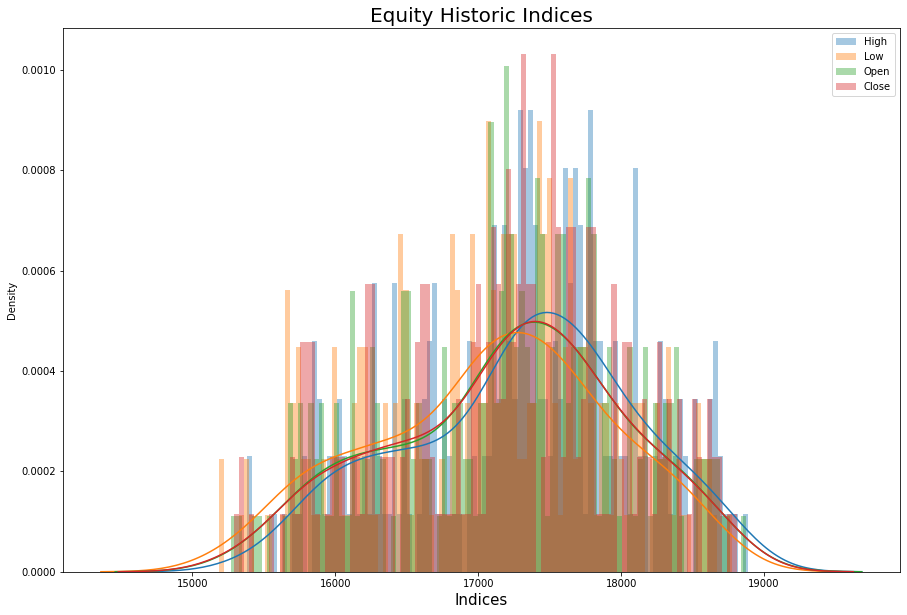

In [2]:
# Ran the code using GOOGLE COLAB

# Covered requirements: 
# It must pull data from the internet (typically webpages) 
# It must pull data from 5 different webpages (using pandas)-- This is 5th page 
# It must do some basic calculations on numerical data from 3 of those pages (mean, median, mode, min, max) 
# It must make use of your own methods where appropriate 
# It must produce at least 3 charts from 3 of those pages 
# It must save the data to a file 


# Covered Additional requirements 
# 1 of the webpages includes data which changes daily-- This is the 1st page  
# The 5 webpages are from 5 different websites 
# It does basic calculations on all 5 of those webpages 
# It uses BeautifulSoup on 1 of the webpages and parses the html-- This is the 4th page using bs4
# It produces 5 charts from all 5 of the webpages 
# It saves the charts in addition to the data, to image files 


import pandas as pd
import bs4
import requests
from  datetime import datetime , timedelta
from io import StringIO
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

session = requests.session()
headers = {
    "user-agent": "Chrome/87.0.4280.88"
}
head = {
    'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/87.0.4280.88 Safari/537.36 "
}


def getHistoryData(company, from_date=(datetime.today().strftime("%d-%m-%Y")), to_date=(datetime(datetime.today().year - 1, datetime.today().month,datetime.today().day).strftime("%d-%m-%Y"))):
    session.get("https://www.nseindia.com", headers=head)
    session.get("https://www.nseindia.com/get-quotes/equity?symbol=" + company, headers=head)  # to save cookies
    session.get("https://www.nseindia.com/api/historical/cm/equity?symbol="+company, headers=head)
    url = "https://www.nseindia.com/api/historical/cm/equity?symbol=" + company + "&series=[%22EQ%22]&from=" + from_date + "&to=" + to_date + "&csv=true"
    webdata = session.get(url=url, headers=head)
    df = pd.read_csv(StringIO(webdata.text[3:]))
    return df


def niftyHistoryData(varient, from_date = ((datetime(datetime.today().year - 1, datetime.today().month, datetime.today().day) + timedelta(days=2)).strftime("%d-%m-%Y")), to_date =(datetime.today().strftime("%d-%m-%Y"))):
    varient = varient.upper()
    varient = varient.replace(' ', '%20')
    varient = varient.replace('-', '%20')
    webData = session.get(
        url="https://www1.nseindia.com/products/dynaContent/equities/indices/historicalindices.jsp?indexType=" + varient +
            "&fromDate=" + from_date + "&toDate=" + to_date, headers=head)
    soup = bs4.BeautifulSoup(webData.text, 'html5lib')
    return pd.read_csv(StringIO(soup.find('div', {'id': 'csvContentDiv'}).contents[0].replace(':','\n')))


dataframe1 = (getHistoryData('AMZN',from_date='15-01-2021',to_date='14-01-2022')) #using Amazon shares data as of now, can be changed to any name and date range
print(dataframe1)
dataframe1.to_csv('dataframe1.csv')                                             #Save Frist Table to CSV
files.download('dataframe1.csv')                                                #Download Frist Table to CSV

dataframe2 = (niftyHistoryData('NIFTY 50'))
print(dataframe2)
dataframe2.to_csv('dataframe2.csv')                                             #Save second Table to CSV
files.download('dataframe2.csv')                                                #Download second Table to CSV


# Performing basic operations on the second table 
print ("\n" + "The output of basic operations is: \n")

sum=dataframe2.loc[:,"High"].sum()
print("\nThe Sum of high indice is:", sum)

max=dataframe2.loc[:,"High"].max()
print("\nThe Maximum value for high indice is:", max)

mean=dataframe2['High'].mean()
print("\nThe Mean value of high indice is: ", mean)

median=dataframe2.loc[:,"High"].median()
print("\nThe Median value for high indice is:", median)

correlation=dataframe2.corr()
print("\nThe Correlation between different indices is as follows\n", correlation)

# graph 1 
plt.figure(figsize=(15,10))
sns.distplot(dataframe2['High'], bins=100, label="High")
sns.distplot(dataframe2['Low'], bins=100, label="Low")
sns.distplot(dataframe2['Open'], bins=100, label="Open")
sns.distplot(dataframe2['Close'], bins=100, label="Close")
plt.legend()
plt.title("Equity Historic Indices", fontsize = 20)
plt.xlabel("Indices", fontsize = 15)
plt.savefig('graph5-1.png')                                                     
files.download('graph5-1.png')                                                  

